Solution template for Task 1

This file is Adesoba Olamide solution  for the Task 1 of the Quantium Virtual Internship.
It will walk you through my analysis of the tasks.

In [4]:
# loading all libraries required for this tasks
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

Exploratory data analysis
The first step in any analysis is to first understand the data. Let's take a look
at each of the datasets provided.

Examining transaction data

In [5]:
## Loading the  required  datasets and assigning a variable name
# WHERE TD = TRANSACTIONAL DATA  , CD = CUSTOMER DATA
TD = pd.read_excel(r'C:\Users\OLAMIDE\Desktop\New folder\tasksone\QVI_transaction_data.xlsx')
TD.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
TD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [7]:
TD.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Converting date column to datetime format

In [8]:
TD.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Examination of  the words in PROD_NAME to see if there are any incorrect entries such as products that are not chips

In [9]:
list = ['Chip','Chips','Chp','Chps','Crisps','Pringles']
TD.PROD_NAME.str.contains('|'.join(list)).sum()

121887

In [10]:
CHIPSTD = TD[TD.PROD_NAME.str.contains('|'.join(list))]
CHIPSTD

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
...,...,...,...,...,...,...,...,...
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6
264828,2018-07-27,272,272236,269974,68,Pringles Chicken Salt Crips 134g,2,7.4
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6


In [11]:
CHIPSTD.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,121887.000000,1.218870e+05,121887.000000,121887.000000,121887.000000,121887.000000
mean,135.313290,1.357808e+05,135392.533084,55.421103,1.910565,7.181560
std,76.852604,8.059572e+04,78086.001407,34.431679,0.872094,3.466651
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.700000
25%,70.000000,7.003500e+04,67699.500000,26.000000,2.000000,6.000000
50%,131.000000,1.314040e+05,135731.000000,55.000000,2.000000,7.400000
75%,203.000000,2.031905e+05,203070.000000,81.000000,2.000000,8.400000
max,272.000000,2.373711e+06,270209.000000,112.000000,200.000000,650.000000


There are no nulls in the columns but product quantity appears to have an outlier.
investigating further the case where 200 packets of chips are bought in one transaction

In [12]:
outlier = CHIPSTD[CHIPSTD['PROD_QTY'] == 200]
outlier

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


TO check if the consumer have any other order

In [13]:
orders = CHIPSTD[CHIPSTD['LYLTY_CARD_NBR'] == 226000]
orders

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [14]:
segment=CHIPSTD['DATE'].value_counts().reset_index()
segment.columns=("DATE","TRANSACTION Count")
seg = segment.sort_values(by = 'DATE')
seg = seg.set_index('DATE')
seg

,TRANSACTION Count
DATE,
2018-07-01,295
2018-07-02,316
2018-07-03,327
2018-07-04,335
2018-07-05,330
...,...
2019-06-26,313
2019-06-27,302
2019-06-28,365


There’s only 364 rows, meaning only 364 dates which indicates a missing date. Let’s create a sequence of
dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to
find the missing date

<AxesSubplot:xlabel='DATE'>

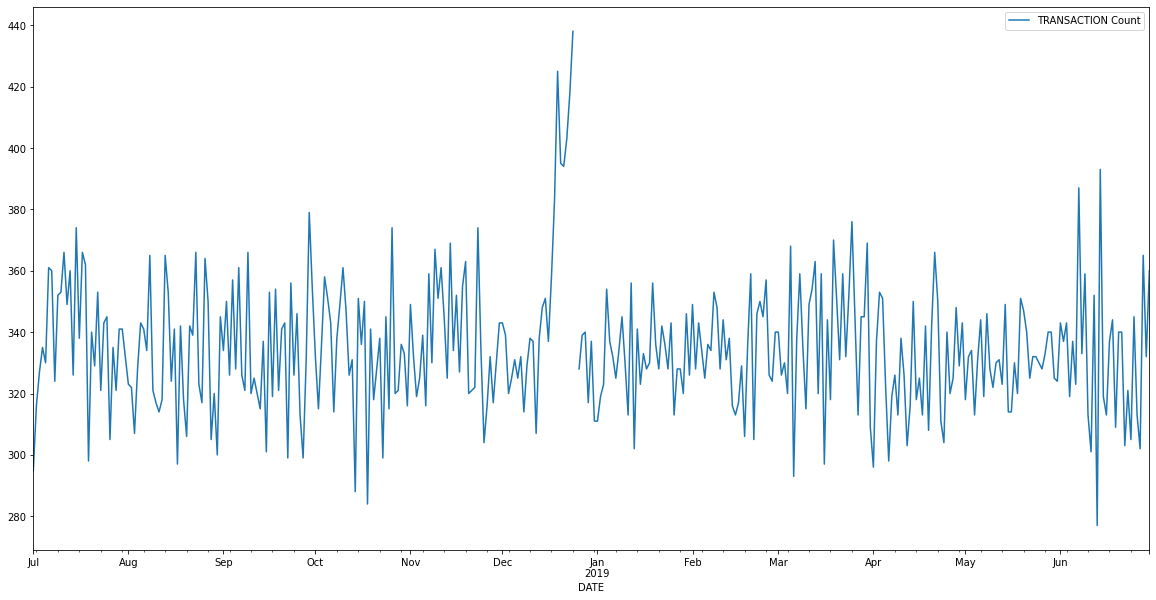

In [15]:
seg.asfreq('d').plot(figsize=(20,10))

We can see that there is an increase in purchases in December and a break in late December. Let’s zoom in
on this.

In [16]:
segment=CHIPSTD['DATE'].value_counts().reset_index()
segment.columns=("DATE","TRANSACTION Count")
seg1 = segment[(segment['DATE'] >= '2018-12-1') & (segment['DATE'] <= '2018-12-31')]
seg1 = seg1.sort_values(by = 'DATE')
seg1 = seg1.set_index('DATE')
seg1

,TRANSACTION Count
DATE,
2018-12-01,343
2018-12-02,339
2018-12-03,320
2018-12-04,325
2018-12-05,331
2018-12-06,325
2018-12-07,332
2018-12-08,314
2018-12-09,329


<AxesSubplot:xlabel='DATE'>

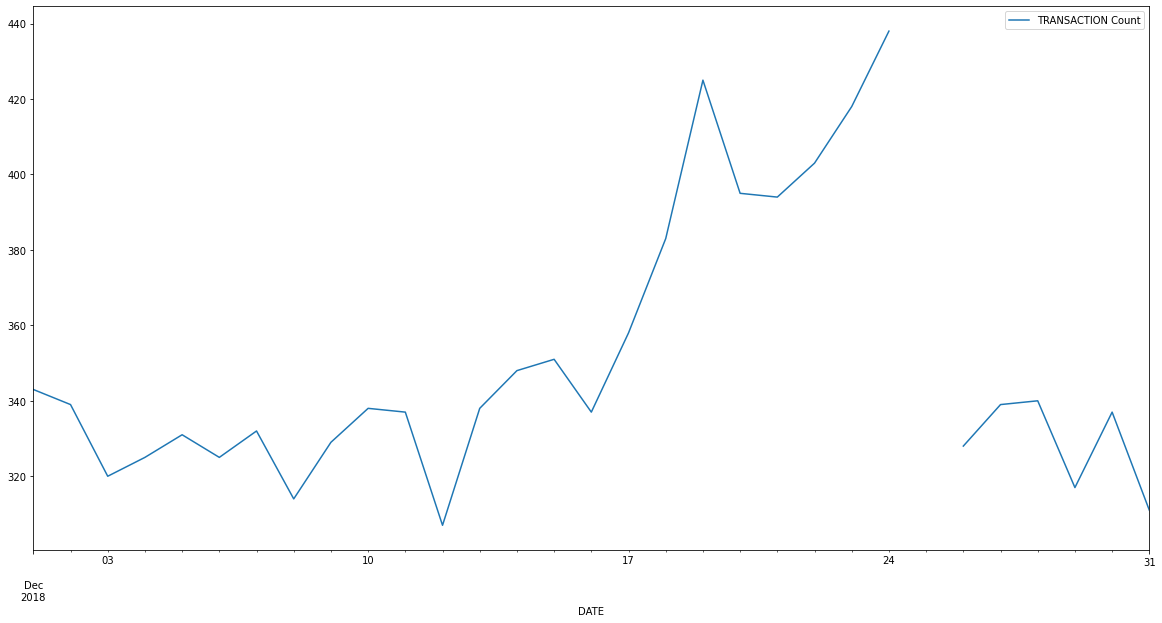

In [17]:
seg1.asfreq('d').plot(figsize=(20,10))

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on
Christmas day itself. This is due to shops being closed on Christmas day.
we can move on to creating other features
such as brand of chips or pack size from PROD_NAME. We will start with pack size.

In [18]:
m =  CHIPSTD['PROD_NAME'].str[-4:-1]
#k = list(m)
CHIPSTD['PACK_SIZE'] = m
CHIPSTD['PACK_SIZE']
CHIPSTD

<ipython-input-18-fde00e8041f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHIPSTD['PACK_SIZE'] = m


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
...,...,...,...,...,...,...,...,...,...
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,150
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110
264828,2018-07-27,272,272236,269974,68,Pringles Chicken Salt Crips 134g,2,7.4,134
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175


In [19]:
CHIPSTD["PACK_SIZE"] = pd.to_numeric(CHIPSTD["PACK_SIZE"])
PS = CHIPSTD["PACK_SIZE"].value_counts().reset_index()
PS.columns=("PACK_SIZE","TRANSACTIONAL Count")
PS

<ipython-input-19-a65404ad62cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHIPSTD["PACK_SIZE"] = pd.to_numeric(CHIPSTD["PACK_SIZE"])


,PACK_SIZE,TRANSACTIONAL Count
0,175,29215
1,134,25102
2,150,15956
3,170,15413
4,110,9693
5,165,6442
6,380,6418
7,200,4473
8,330,3197
9,90,3008


The largest size is 380g and the smallest size is 90g - seems sensible!

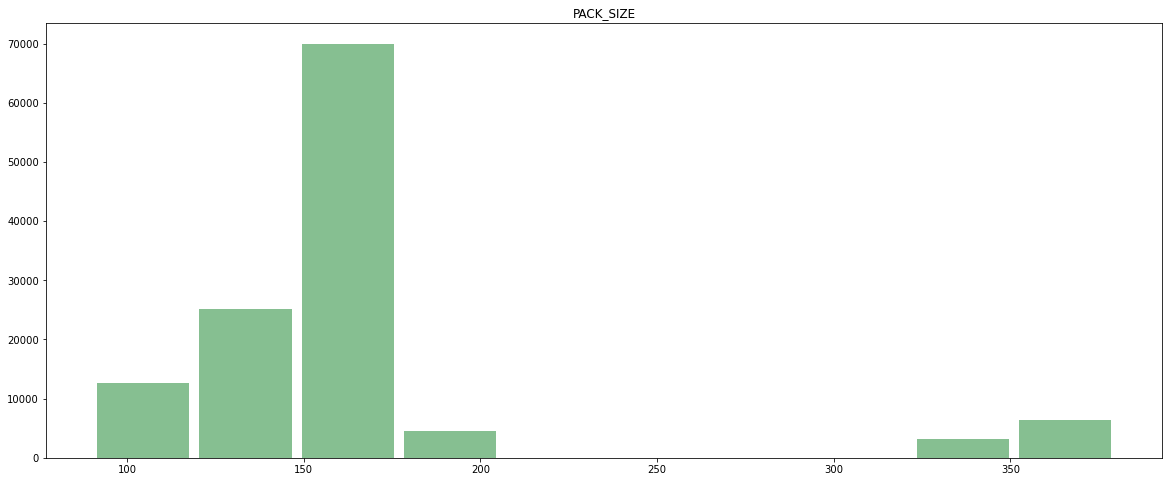

In [20]:
ax = CHIPSTD.hist(column='PACK_SIZE', grid=False, figsize=(20,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]

In [21]:
CHIPSTD[['BRAND_NAME','OTHER_NMAES']] = CHIPSTD["PROD_NAME"].str.split(" ", 1, expand=True)
CHIPSTD["BRAND_NAME"] = CHIPSTD["BRAND_NAME"].str.strip("-")
CHIPSTD

C:\Users\OLAMIDE\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-21-064fc068862c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHIPSTD["BRAND_NAME"] = CHIPSTD["BRAND_NAME"].str.strip("-")


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,OTHER_NMAES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,Chip Compny SeaSalt175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,Crinkle Cut Chips Chicken 170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,Chip Thinly S/Cream&Onion 175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,Tortilla ChpsHny&Jlpno Chili 150g
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,Crinkle Chips Salt & Vinegar 330g
...,...,...,...,...,...,...,...,...,...,...,...
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,150,Kettle,Tortilla ChpsBtroot&Ricotta 150g
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,Cobs,Popd Sea Salt Chips 110g
264828,2018-07-27,272,272236,269974,68,Pringles Chicken Salt Crips 134g,2,7.4,134,Pringles,Chicken Salt Crips 134g
264830,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175,Thins,Chips Light& Tangy 175g


In [22]:
BN = CHIPSTD["BRAND_NAME"].value_counts().reset_index()
BN.columns=("BRAND_NAME","TRANSACTIONAL Count")
BN

,BRAND_NAME,TRANSACTIONAL Count
0,Pringles,25102
1,Smiths,16872
2,Doritos,15874
3,Thins,14075
4,Cobs,9693
5,Kettle,9580
6,WW,7443
7,Tyrrells,6442
8,Natural,6050
9,Dorito,3185


Examining customer data

In [23]:
## Loading the  required  datasets and assigning a variable name
# WHERE CD = CUSTOMER DATA
CD = pd.read_csv(r'C:\Users\OLAMIDE\Desktop\New folder\tasksone\QVI_purchase_behaviour.csv')
CD.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [24]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [25]:
CD.describe

<bound method NDFrame.describe of        LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]>

In [26]:
CD.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer
dataset

Merging transaction data to customer data

In [27]:
CHIPSTDCD = pd.merge(CHIPSTD, CD, on='LYLTY_CARD_NBR')
CHIPSTDCD.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,OTHER_NMAES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,Chip Compny SeaSalt175g,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,Crinkle Cut Chips Chicken 170g,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,Chip Thinly S/Cream&Onion 175g,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,Tortilla ChpsHny&Jlpno Chili 150g,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,Crinkle Chips Salt & Vinegar 330g,MIDAGE SINGLES/COUPLES,Budget


In [28]:
CHIPSTDCD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121887 entries, 0 to 121886
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              121887 non-null  datetime64[ns]
 1   STORE_NBR         121887 non-null  int64         
 2   LYLTY_CARD_NBR    121887 non-null  int64         
 3   TXN_ID            121887 non-null  int64         
 4   PROD_NBR          121887 non-null  int64         
 5   PROD_NAME         121887 non-null  object        
 6   PROD_QTY          121887 non-null  int64         
 7   TOT_SALES         121887 non-null  float64       
 8   PACK_SIZE         121887 non-null  int64         
 9   BRAND_NAME        121887 non-null  object        
 10  OTHER_NMAES       121887 non-null  object        
 11  LIFESTAGE         121887 non-null  object        
 12  PREMIUM_CUSTOMER  121887 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memor

In [29]:
CHIPSTDCD.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,121887.000000,1.218870e+05,121887.000000,121887.000000,121887.000000,121887.000000,121887.000000
mean,135.313290,1.357808e+05,135392.533084,55.421103,1.910565,7.181560,170.267814
std,76.852604,8.059572e+04,78086.001407,34.431679,0.872094,3.466651,61.642555
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.700000,90.000000
25%,70.000000,7.003500e+04,67699.500000,26.000000,2.000000,6.000000,134.000000
50%,131.000000,1.314040e+05,135731.000000,55.000000,2.000000,7.400000,165.000000
75%,203.000000,2.031905e+05,203070.000000,81.000000,2.000000,8.400000,175.000000
max,272.000000,2.373711e+06,270209.000000,112.000000,200.000000,650.000000,380.000000


In [30]:
CHIPSTDCD.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND_NAME          0
OTHER_NMAES         0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [31]:
CHIPSTDCD.to_excel(r'C:\Users\OLAMIDE\Desktop\New folder\tasksone\CLEAN AND COMPLETE EXPLORATION DATA.xlsx')

Data exploration is now complete!

 Data analysis on customer segments
    
Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

WHERE ANPC >>>> Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER


APPC >>>> Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

PC   >>>> Proportion of customers

PS   >>>> Proportion of sales

In [32]:

LSc = pd.DataFrame(CHIPSTDCD.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum', 
                                                                            'LYLTY_CARD_NBR':'nunique',
                                                                            'PROD_QTY':'sum'}))
LSc['ANPC'] = LSc['PROD_QTY']/LSc['LYLTY_CARD_NBR']
LSc['APPC'] = LSc['TOT_SALES']/LSc['PROD_QTY']
LSc['PC'] = 100 * LSc['LYLTY_CARD_NBR']/LSc['LYLTY_CARD_NBR'].sum()
LSc['PS'] = 100 * LSc['TOT_SALES']/LSc['TOT_SALES'].sum()
LSc

TOT_SALES  LYLTY_CARD_NBR  PROD_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                                        
MIDAGE SINGLES/COUPLES Budget             16313.30            1126      4425   
                       Mainstream         40778.35            2625     10505   
                       Premium            26446.85            1810      7134   
NEW FAMILIES           Budget             10053.35             810      2639   
                       Mainstream          7687.50             617      1992   
                       Premium             5279.10             437      1387   
OLDER FAMILIES         Budget             74114.95            3833     20081   
                       Mainstream         46850.95            2342     12662   
                       Premium            37242.10            1871     10216   
OLDER SINGLES/COUPLES  Budget             62374.80            3991     16446   
                       Mainstream         60687.60            3907     16162   
                       Premium            59704.55            3788     15747   
RETIREES               Budget             51830.40            3501     13573   
                       Mainstream         70299.95            4964     18638   
                       Premium            44079.95            3030     11521   
YOUNG FAMILIES         Budget             62163.75            3289     16786   
                       Mainstream         42271.55            2248     11492   
                       Premium            37611.20            1972     10153   
YOUNG SINGLES/COUPLES  Budget             27942.90            2538      7691   
                       Mainstream         72632.20            5749     18402   
                       Premium            18973.50            1728      5221   

                                             ANPC      APPC         PC  \
LIFESTAGE              PREMIUM_CUSTOMER                                  
MIDAGE SINGLES/COUPLES Budget            3.929840  3.686621   2.004415   
                       Mainstream        4.001905  3.881804   4.672814   
                       Premium           3.941436  3.707156   3.222017   
NEW FAMILIES           Budget            3.258025  3.809530   1.441897   
                       Mainstream        3.228525  3.859187   1.098334   
                       Premium           3.173913  3.806128   0.777912   
OLDER FAMILIES         Budget            5.238977  3.690800   6.823199   
                       Mainstream        5.406490  3.700122   4.169040   
                       Premium           5.460182  3.645468   3.330604   
OLDER SINGLES/COUPLES  Budget            4.120772  3.792703   7.104457   
                       Mainstream        4.136678  3.754956   6.954927   
                       Premium           4.157075  3.791487   6.743093   
RETIREES               Budget            3.876892  3.818640   6.232199   
                       Mainstream        3.754633  3.771861   8.836514   
                       Premium           3.802310  3.826052   5.393762   
YOUNG FAMILIES         Budget            5.103679  3.703309   5.854813   
                       Mainstream        5.112100  3.678346   4.001709   
                       Premium           5.148580  3.704442   3.510396   
YOUNG SINGLES/COUPLES  Budget            3.030339  3.633195   4.517944   
                       Mainstream        3.200905  3.946973  10.233908   
                       Premium           3.021412  3.634074   3.076047   

                                               PS  
LIFESTAGE              PREMIUM_CUSTOMER            
MIDAGE SINGLES/COUPLES Budget            1.863656  
                       Mainstream        4.658579  
                       Premium           3.021327  
NEW FAMILIES           Budget            1.148510  
                       Mainstream        0.878231  
                       Premium           0.603092  
OLDER FAMILIES         Budget            8.467002  
                       Mainst

In [33]:
LSc1 = LSc.unstack()['PC']
LSc1

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,2.004415,4.672814,3.222017
NEW FAMILIES,1.441897,1.098334,0.777912
OLDER FAMILIES,6.823199,4.169040,3.330604
OLDER SINGLES/COUPLES,7.104457,6.954927,6.743093
RETIREES,6.232199,8.836514,5.393762
YOUNG FAMILIES,5.854813,4.001709,3.510396
YOUNG SINGLES/COUPLES,4.517944,10.233908,3.076047


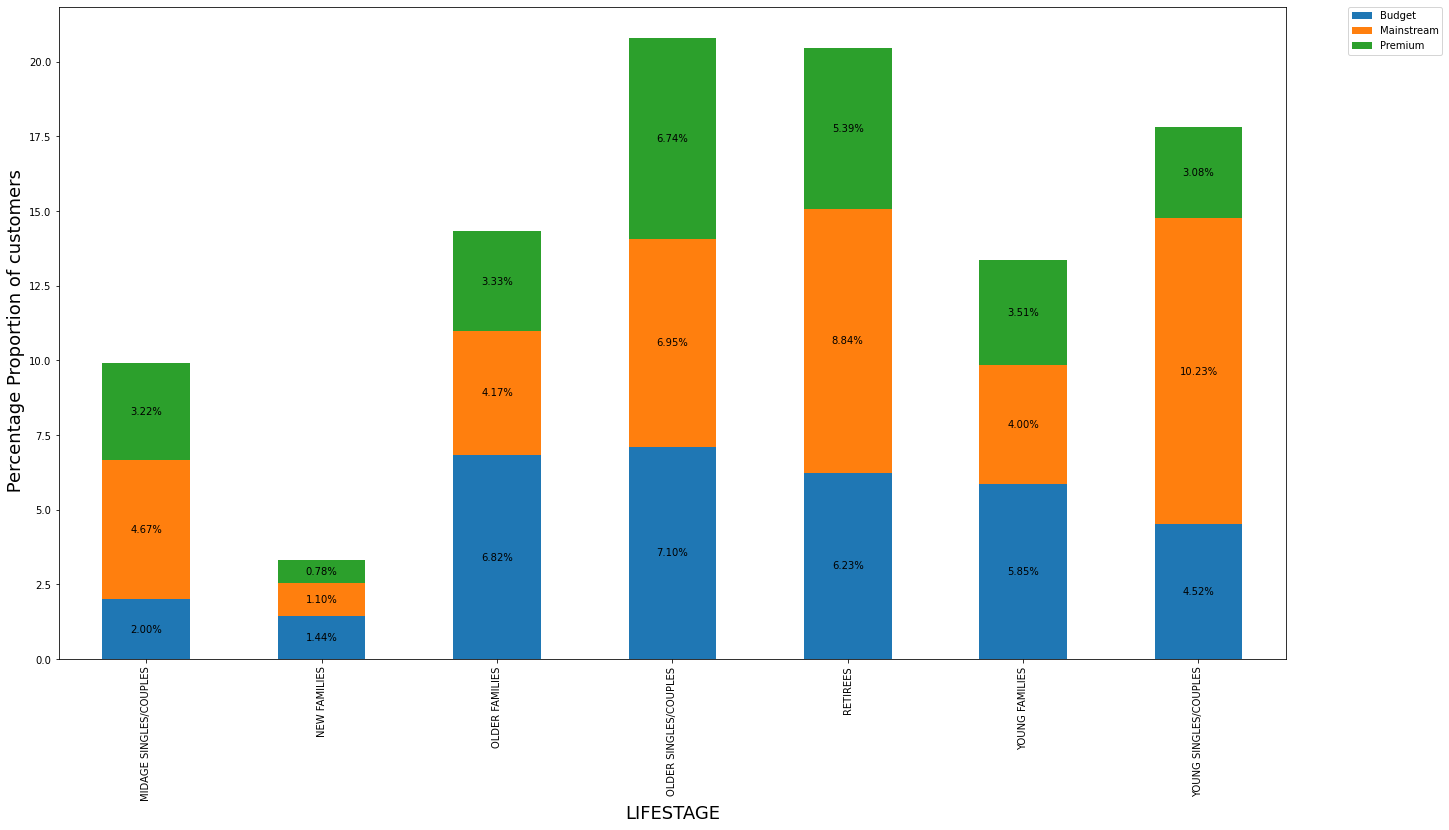

In [34]:
ax = LSc1.plot.bar(stacked=True, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}%'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Percentage Proportion of customers", fontsize=18)
ax.set_xlabel("LIFESTAGE", fontsize=18)
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

In [35]:
LSc2 = LSc.unstack()['PS']
LSc2

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1.863656,4.658579,3.021327
NEW FAMILIES,1.148510,0.878231,0.603092
OLDER FAMILIES,8.467002,5.352322,4.254593
OLDER SINGLES/COUPLES,7.125789,6.933041,6.820736
RETIREES,5.921182,8.031170,5.035759
YOUNG FAMILIES,7.101679,4.829164,4.296759
YOUNG SINGLES/COUPLES,3.192238,8.297610,2.167561


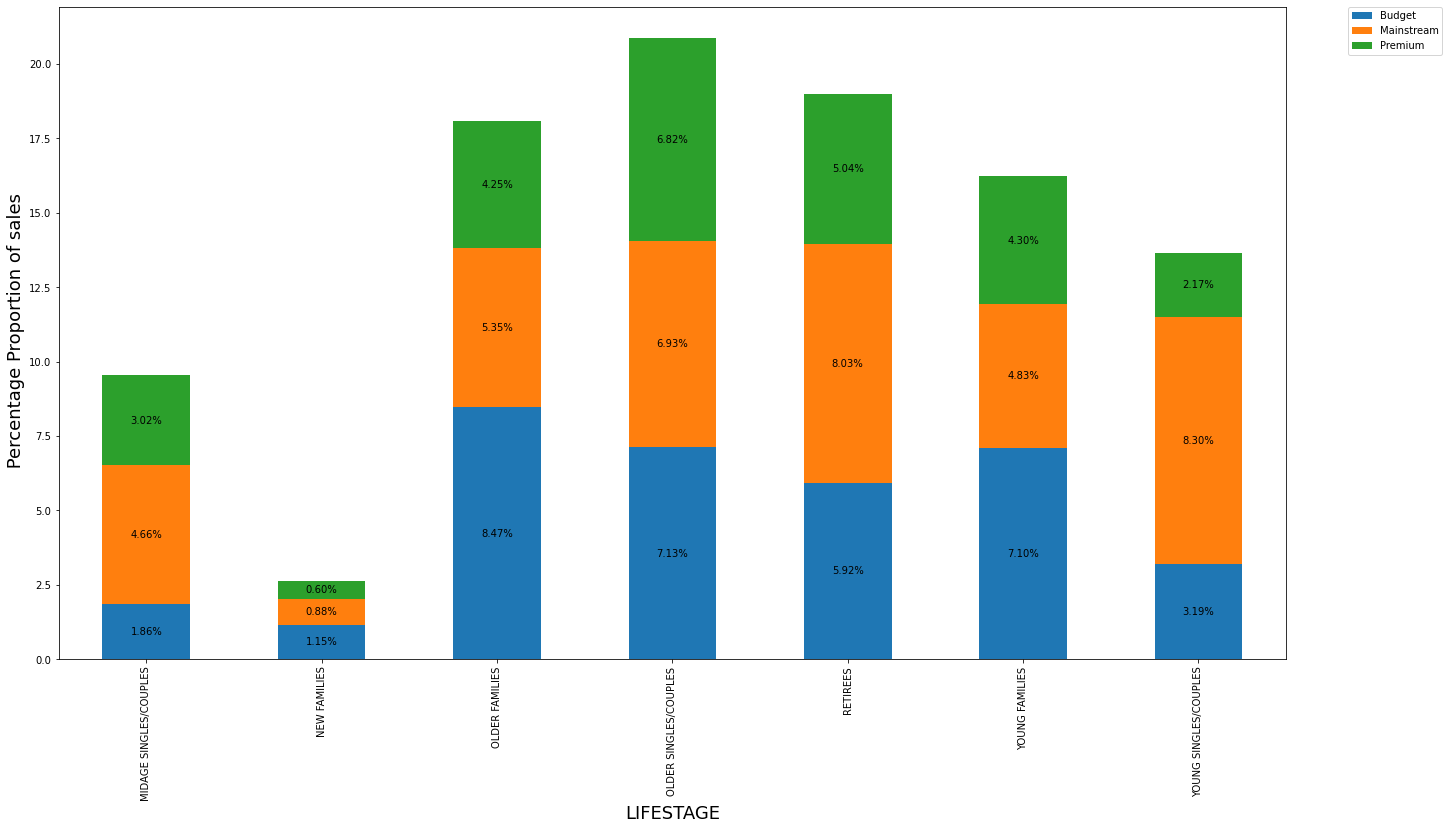

In [36]:
ax = LSc2.plot.bar(stacked=True, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}%'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Percentage Proportion of sales", fontsize=18)
ax.set_xlabel("LIFESTAGE", fontsize=18)
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes
to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

In [37]:
LSc3 = LSc.unstack()['ANPC']
LSc3

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,3.929840,4.001905,3.941436
NEW FAMILIES,3.258025,3.228525,3.173913
OLDER FAMILIES,5.238977,5.406490,5.460182
OLDER SINGLES/COUPLES,4.120772,4.136678,4.157075
RETIREES,3.876892,3.754633,3.802310
YOUNG FAMILIES,5.103679,5.112100,5.148580
YOUNG SINGLES/COUPLES,3.030339,3.200905,3.021412


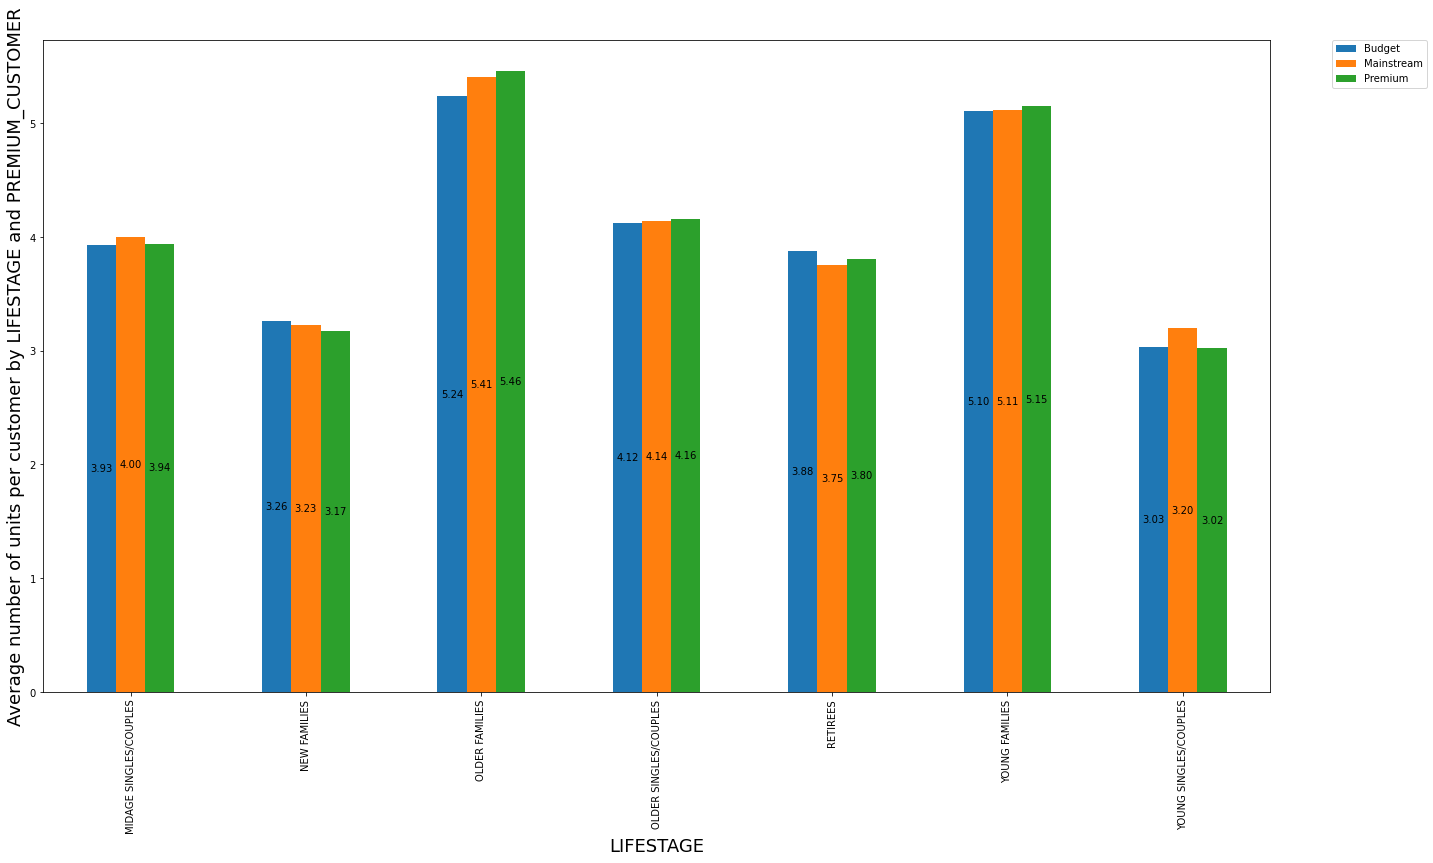

In [38]:
ax = LSc3.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel("Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER", fontsize=18)
ax.set_xlabel("LIFESTAGE", fontsize=18)
plt.show()

Older families and young families in general buy more chips per customer

In [39]:
LSc4 = LSc.unstack()['APPC']
LSc4

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,3.686621,3.881804,3.707156
NEW FAMILIES,3.809530,3.859187,3.806128
OLDER FAMILIES,3.690800,3.700122,3.645468
OLDER SINGLES/COUPLES,3.792703,3.754956,3.791487
RETIREES,3.818640,3.771861,3.826052
YOUNG FAMILIES,3.703309,3.678346,3.704442
YOUNG SINGLES/COUPLES,3.633195,3.946973,3.634074


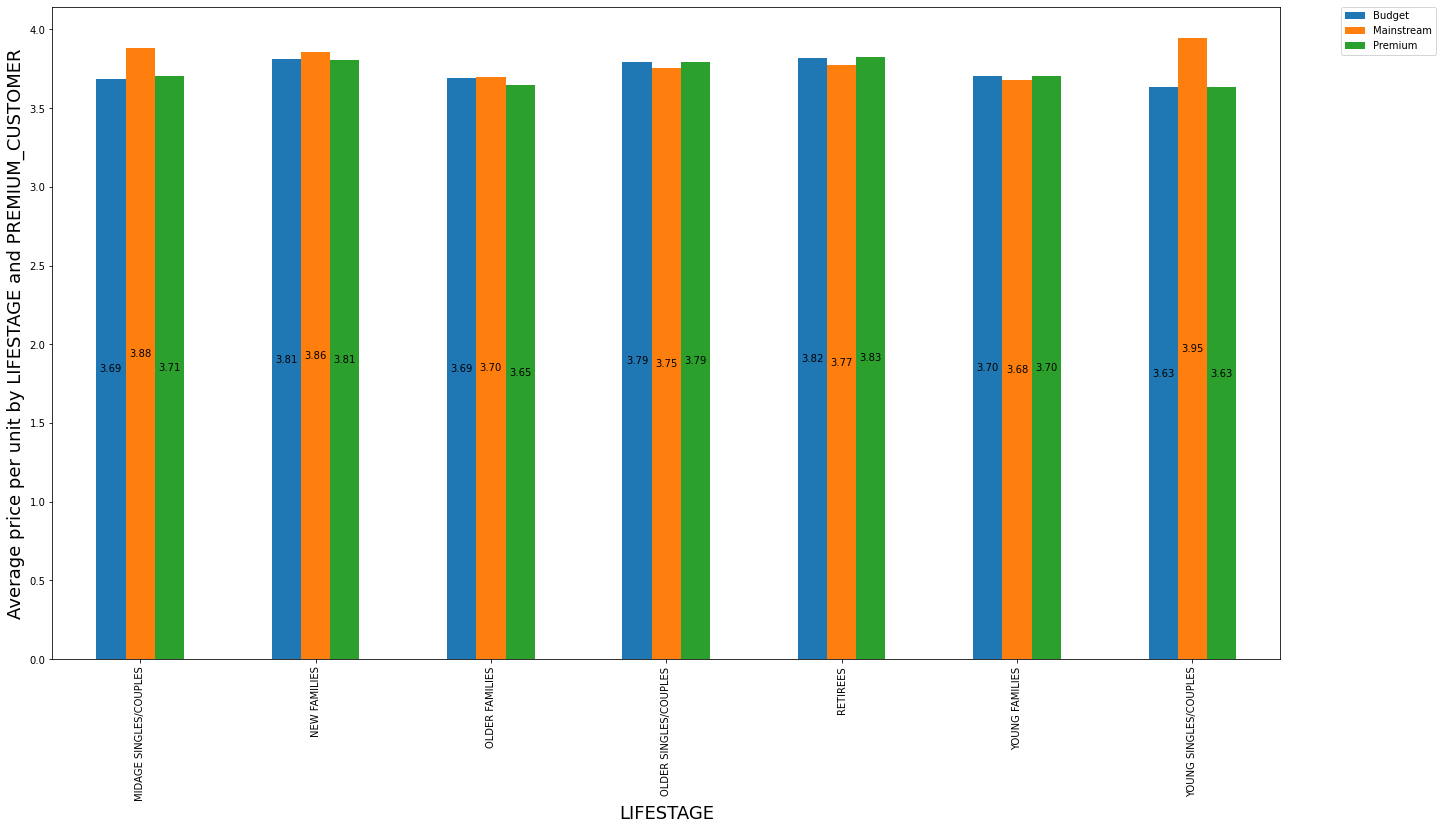

In [40]:
ax = LSc4.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel("Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER", fontsize=18)
ax.set_xlabel("LIFESTAGE", fontsize=18)
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared
to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.
As the difference in average price per unit isn’t large, we can check if this difference is statistically different

In [64]:
A = LSc4.loc[['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES'],['Mainstream']]
A

PREMIUM_CUSTOMER,Mainstream
LIFESTAGE,
MIDAGE SINGLES/COUPLES,3.881804
YOUNG SINGLES/COUPLES,3.946973


In [49]:
B = LSc4.loc[['MIDAGE SINGLES/COUPLES','YOUNG SINGLES/COUPLES'],['Budget','Premium']]
B

PREMIUM_CUSTOMER,Budget,Premium
LIFESTAGE,,
MIDAGE SINGLES/COUPLES,3.686621,3.707156
YOUNG SINGLES/COUPLES,3.633195,3.634074


In [43]:
import scipy.stats as stats

In [50]:
stats.ttest_ind(A,B)

Ttest_indResult(statistic=array([6.03963542, 4.97912083]), pvalue=array([0.02633622, 0.03804893]))

The t-test results in a p-value < 0.02633, i.e. the unit price for mainstream, young and mid-age singles and
couples are significantly higher than that of budget or premium, young and midage singles and couples

In [86]:
LSc7 = pd.DataFrame(CHIPSTDCD.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['BRAND_NAME'].value_counts())
LSc7

BRAND_NAME
PREMIUM_CUSTOMER LIFESTAGE              BRAND_NAME            
Budget           MIDAGE SINGLES/COUPLES Pringles           449
                                        Doritos            319
                                        Smiths             317
                                        Thins              269
                                        Cobs               180
...                                                        ...
Premium          YOUNG SINGLES/COUPLES  Dorito              71
                                        Tostitos            62
                                        Sunbites            56
                                        French              45
                                        Snbts               41

[294 rows x 1 columns]

In [87]:
LSc8 = LSc7.unstack()['BRAND_NAME']
LSc8

BRAND_NAME                               Cobs  Dorito  Doritos  French  \
PREMIUM_CUSTOMER LIFESTAGE                                               
Budget           MIDAGE SINGLES/COUPLES   180      60      319      26   
                 NEW FAMILIES             124      41      186      14   
                 OLDER FAMILIES           760     248     1276     142   
                 OLDER SINGLES/COUPLES    706     216     1126      87   
                 RETIREES                 602     177      998      76   
                 YOUNG FAMILIES           612     216     1102     123   
                 YOUNG SINGLES/COUPLES    290      98      492      71   
Mainstream       MIDAGE SINGLES/COUPLES   495     138      782      43   
                 NEW FAMILIES              96      35      155      15   
                 OLDER FAMILIES           505     162      790      82   
                 OLDER SINGLES/COUPLES    699     232     1112     104   
                 RETIREES                 776     251     1332      96   
                 YOUNG FAMILIES           454     132      716      89   
                 YOUNG SINGLES/COUPLES    864     303     1488      78   
Premium          MIDAGE SINGLES/COUPLES   286     102      466      48   
                 NEW FAMILIES              68      15      108       3   
                 OLDER FAMILIES           359     125      570      59   
                 OLDER SINGLES/COUPLES    631     236     1122      95   
                 RETIREES                 506     191      776      56   
                 YOUNG FAMILIES           438     136      652      66   
                 YOUNG SINGLES/COUPLES    242      71      306      45   

BRAND_NAME                               Kettle  Natural  Pringles  Smiths  \
PREMIUM_CUSTOMER LIFESTAGE                                                   
Budget           MIDAGE SINGLES/COUPLES     169      133       449     317   
                 NEW FAMILIES               110       63       309     169   
                 OLDER FAMILIES             757      576      1996    1623   
                 OLDER SINGLES/COUPLES      713      420      1843    1115   
                 RETIREES                   599      293      1517     904   
                 YOUNG FAMILIES             657      483      1674    1313   
                 YOUNG SINGLES/COUPLES      268      278       832     646   
Mainstream       MIDAGE SINGLES/COUPLES     491      213      1159     762   
                 NEW FAMILIES               103       39       224     135   
                 OLDER FAMILIES             481      390      1234     978   
                 OLDER SINGLES/COUPLES      657      410      1720    1134   
                 RETIREES                   807      479      2103    1270   
                 YOUNG FAMILIES             445      310      1148     934   
                 YOUNG SINGLES/COUPLES      895      321      2315    1140   
Premium          MIDAGE SINGLES/COUPLES     271      204       781     517   
                 NEW FAMILIES                53       30       165      82   
                 OLDER FAMILIES             341      288      1014     767   
                 OLDER SINGLES/COUPLES      685      368      1744    1096   
                 RETIREES                   503      268      1331     776   
                 YOUNG FAMILIES             385      314      1007     755   
                 YOUNG SINGLES/COUPLES      190      170       537     439   

BRAND_NAME                               Snbts  Sunbites  Thins  Tostitos  \
PREMIUM_CUSTOMER LIFESTAGE                                                  
Budget           MIDAGE SINGLES/COUPLES     40        30    269        54   
                 NEW FAMILIES               17        13    176        38   
                 OLDER FAMILIES            162       143   1171       237   
                 OLDER SINGLES/COUPLES     106        85   1023       230   
                 RETIREES               

In [88]:
LSc9 = pd.DataFrame(CHIPSTDCD.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PACK_SIZE'].value_counts())
LSc9

PACK_SIZE
PREMIUM_CUSTOMER LIFESTAGE              PACK_SIZE           
Budget           MIDAGE SINGLES/COUPLES 175              572
                                        134              449
                                        170              310
                                        150              304
                                        110              180
...                                                      ...
Premium          YOUNG SINGLES/COUPLES  200              144
                                        165              132
                                        160              112
                                        90                97
                                        330               60

[231 rows x 1 columns]

In [89]:
LSc10 = LSc9.unstack()['PACK_SIZE']
LSc10

PACK_SIZE                                90   110   134   150  160  165   170  \
PREMIUM_CUSTOMER LIFESTAGE                                                      
Budget           MIDAGE SINGLES/COUPLES   70  180   449   304   73  107   310   
                 NEW FAMILIES             30  124   309   183   29   88   173   
                 OLDER FAMILIES          305  760  1996  1263  306  489  1383   
                 OLDER SINGLES/COUPLES   191  706  1843  1170  188  460  1047   
                 RETIREES                160  602  1517  1012  150  398   885   
                 YOUNG FAMILIES          254  612  1674  1100  228  449  1155   
                 YOUNG SINGLES/COUPLES   136  290   832   460  148  204   562   
Mainstream       MIDAGE SINGLES/COUPLES   69  495  1159   806  101  298   687   
                 NEW FAMILIES             15   96   224   168   23   57   125   
                 OLDER FAMILIES          169  505  1234   802  169  327   829   
                 OLDER SINGLES/COUPLES   222  699  1720  1095  212  467  1086   
                 RETIREES                243  776  2103  1337  221  514  1244   
                 YOUNG FAMILIES          196  454  1148   749  162  301   781   
                 YOUNG SINGLES/COUPLES   128  864  2315  1457  128  619  1215   
Premium          MIDAGE SINGLES/COUPLES  110  286   781   463  116  206   455   
                 NEW FAMILIES             16   68   165    98   15   42    85   
                 OLDER FAMILIES          148  359  1014   569  163  277   637   
                 OLDER SINGLES/COUPLES   171  631  1744  1149  183  413  1005   
                 RETIREES                132  506  1331   810  112  347   724   
                 YOUNG FAMILIES          146  438  1007   637  131  247   674   
                 YOUNG SINGLES/COUPLES    97  242   537   324  112  132   351   

PACK_SIZE                                 175  200  330  380  
PREMIUM_CUSTOMER LIFESTAGE                                    
Budget           MIDAGE SINGLES/COUPLES   572  102   47  114  
                 NEW FAMILIES             329   41   30   82  
                 OLDER FAMILIES          2585  448  289  510  
                 OLDER SINGLES/COUPLES   2033  277  224  456  
                 RETIREES                1641  212  204  375  
                 YOUNG FAMILIES          2158  369  226  431  
                 YOUNG SINGLES/COUPLES   1125  215   91  183  
Mainstream       MIDAGE SINGLES/COUPLES  1237  132  194  310  
                 NEW FAMILIES             244   30   22   65  
                 OLDER FAMILIES          1660  295  169  326  
                 OLDER SINGLES/COUPLES   1970  330  204  455  
                 RETIREES                2354  342  245  497  
                 YOUNG FAMILIES          1453  246  145  283  
                 YOUNG SINGLES/COUPLES   2058  179  314  626  
Premium          MIDAGE SINGLES/COUPLES   920  154   73  204  
                 NEW FAMILIES             158   35   20   38  
                 OLDER FAMILIES          1250  250  131  238  
                 OLDER SINGLES/COUPLES   1985  270  223  445  
                 RETIREES                1413  177  155  369  
                 YOUNG FAMILIES          1338  225  131  265  
                 YOUNG SINGLES/COUPLES    732  144   60  146

It looks like Mainstream young singles/couples are more likely to purchase a 110g,134g,150g,165g,330g,380g pack of chips compared
to the rest of the population but let’s dive into what brands sell this pack size.

Conclusion
Let’s recap what we’ve found!
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees
is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance
by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.
Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement. We’ll work on measuring the impact of
trials in the next task and putting all these together in the third task.